In [1]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

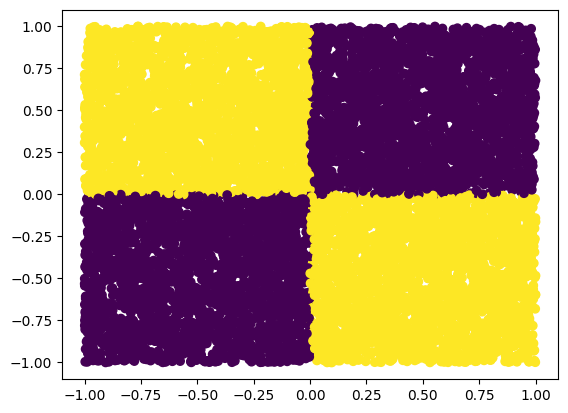

In [ ]:
#Create data that is not linearly separable

X = np.random.rand(10000, 2) * 2 - 1

y = ((X[:, 0] > 0) & (X[:, 1] < 0)) | ((X[:, 0] < 0) & (X[:, 1] > 0)).astype(int)

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [18]:
df_2D = pd.DataFrame(X, columns=['x1','x2'])
df_2D['y'] = y

df_2D.head()

,x1,x2,y
0,-0.432913,0.449267,1
1,-0.818668,-0.796832,0
2,-0.751204,0.080304,1
3,0.383762,-0.733498,1
4,-0.058199,0.391013,1


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Since LogisticRegression is a linear classifier, it will not perform well

lr = LogisticRegression()

lr.fit(X_train, y_train)
preds = lr.predict(X_test)

print(f'Accuracy (logistic regression): {np.mean(preds == y_test)}')

Accuracy (logistic regression): 0.351


In [ ]:
#This SVM adds a dimension (x^2) to make the data separable by a hyperplane, and the accuracy increases dramatically

svc = SVC(kernel='poly', degree=2)

svc.fit(X_train, y_train)
preds = svc.predict(X_test)

print(f'Accuracy (SVM): {np.mean(preds == y_test)}')

Accuracy (SVM): 0.994


In [ ]:
from sklearn.datasets import make_circles

np.random.seed(42)

# Generate a 2D non-linearly separable dataset with make_circles
X_base, y = make_circles(n_samples=500, noise=0.1, factor=0.5, random_state=42)

# Extend to 5 dimensions by adding noisy features
n_extra_features = 7  # Adding 7 more features to make it 5D total
extra_features = np.random.normal(0, 1, (X_base.shape[0], n_extra_features))

# Combine the original 2D data with the extra features
X = np.hstack((X_base, extra_features))

# X is now a 500 x 5 matrix (5D data), y is the binary target
print("Shape of X:", X.shape)  # (500, 5)
print("Shape of y:", y.shape)  # (500,)

# Optional: Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

df_hdd = pd.DataFrame(X)
df_hdd['y'] = y

df_hdd.head()

Shape of X: (500, 9)
Shape of y: (500,)


,0,1,2,3,4,5,6,7,8,y
0,-0.469186,0.247915,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,1
1,-0.067487,1.006769,0.767435,-0.469474,0.542560,-0.463418,-0.465730,0.241962,-1.913280,0
2,-0.443065,0.027383,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304,1.465649,1
3,-0.611725,-0.631407,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,0
4,-0.789013,0.684519,-0.600639,-0.291694,-0.601707,1.852278,-0.013497,-1.057711,0.822545,0


In [25]:
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

print(f'Accuracy (logistic regression): {np.mean(preds == y_test)}')

Accuracy (logistic regression): 0.5333333333333333


In [60]:
svc = SVC(kernel='poly', degree=2, C=10)

svc.fit(X_train, y_train)
preds = svc.predict(X_test)
train_preds = svc.predict(X_train)

print(f'Test Accuracy (SVM): {np.mean(preds == y_test)}')
print(f'Train Accuracy (SVM): {np.mean(train_preds == y_train)}')

Test Accuracy (SVM): 0.9733333333333334
Train Accuracy (SVM): 0.9885714285714285
